In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import sys, os
sys.path.append(os.path.realpath('..'))
from scipy.interpolate import interp1d

from mgc.independence import *
from mgc.sims import linear

In [2]:
N = [
    50,
    100,
    200,
    500,
    1000,
    2000,
    5000,
    10000
]

tests = [
    Dcorr,
    MGC,
    HHG
]

In [ ]:
for test in tests:
    times = []
    for n in N:
        x, y = linear(n, 1, noise=True)
        time = %timeit -n 1 -r 3 -q -o test().test(x, y, workers=-1)
        times.append(np.min(time.timings))
    np.savetxt('../benchmarks/perf/{}.csv'.format(test.__name__), times, delimiter=',')
    
for test in [Dcorr]:
    times = []
    for n in N:
        x, y = linear(n, 1, noise=True)
        time = %timeit -n 1 -r 3 -q -o test().test(x, y, workers=-1, auto=True)
        times.append(np.min(time.timings))
    np.savetxt('../benchmarks/perf/Fast_{}.csv'.format(test.__name__), times, delimiter=',')

In [37]:
import seaborn as sns
sns.set(color_codes=True, style='white', context='talk', font_scale=2)
PALETTE = sns.color_palette("Set1")
sns.set_palette(PALETTE[3:])

In [44]:
FONTSIZE = 30

def plot_wall_times():
    fig = plt.figure(figsize=(10,7))
    ax = plt.subplot(111)
    
    custom_color = {
        "Dcorr" : "#377eb8",
        "MGC" : "#e41a1c",
        "Fast_Dcorr" : "#377eb8",
        "HHG" : "#4daf4a"
    }
    
    test_name = [
        "HHG",
        "MGC",
        "HHG_hhg",
        "Dcorr",
        "Dcorr_energy",
        "Dcorr_kernlab",
        "Fast_Dcorr",
    ]
    
    line_titles = [
        "HHG (hyppo)",
        "MGC (hyppo)",
        "HHG (HHG)",
        "Dcorr (hyppo)",
        "Dcorr (energy)",
        "MMD (kernlab)",
        "Fast Dcorr (hyppo)",
    ]
    
    i = 0
    for name in test_name:
        test_times = np.genfromtxt('../benchmarks/perf/{}.csv'.format(name), delimiter=',')
        if name in ["Dcorr", "MGC", "HHG"]:
            ax.plot(N, test_times, custom_color[name], label=line_titles[i], lw=5)
        elif name in ["Fast_Dcorr"]:
            ax.plot(N, test_times, color=custom_color[name], label=line_titles[i], lw=5, linestyle='dashed')
        else:
            ax.plot(N, test_times, label=line_titles[i], lw=5, linestyle="dotted")
        i += 1

#     x_dir = N[-1] + 3067
#     ax.annotate("Fast MGC (mgc)", xy=(x_dir, 140), color="#e41a1c", fontsize=30)
#     ax.annotate("Dcorr (energy)", xy=(x_dir, 50), color="#984ea3", fontsize=30)
#     ax.annotate("Dcorr (kernlab)", xy=(x_dir, 22), color="#ff7f00", fontsize=30)
#     ax.annotate("Fast Dcorr (mgc)", xy=(x_dir, 10), color="#377eb8", fontsize=30)
#     ax.annotate("Dcorr (mgc)", xy=(x_dir, 500), color="#377eb8", fontsize=30)
#     ax.annotate("MGC (mgc)", xy=(x_dir, 1380), color="#e41a1c", fontsize=30)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    ax.set_xlabel('Number of Samples')
    ax.set_ylabel('Execution Time\n(Seconds)')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xticks([1e2, 1e3, 1e4])
    ax.set_yticks([1e-4, 1e-2, 1e0, 1e2, 1e4])
    
    leg = plt.legend(bbox_to_anchor=(0.5, -0.05), bbox_transform=plt.gcf().transFigure,
                     ncol=2, loc='upper center')
    leg.get_frame().set_linewidth(0.0)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(5.0)
    plt.savefig('../benchmarks/figs/indep_wall_times.pdf', transparent=True, bbox_inches='tight')

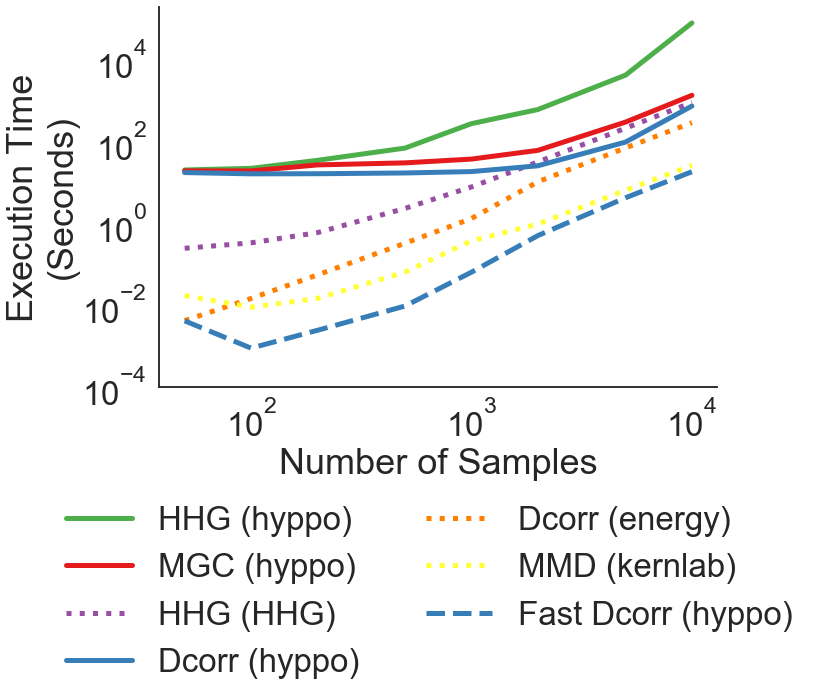

In [45]:
plot_wall_times()